In [3]:
# import packages
import math
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import netCDF4 as nc
import numpy as np
import pandas as pd
from scipy import stats
from scipy.signal import argrelextrema

# functions
def find_nearest(array, value): # finds closest value
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [21]:
# RMSD MERRA2

# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2017.csv')
m = pd.read_csv('data/m2/m2-2017.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2017 = m['QL']
QS2017 = m['QS']
qs2017 = m['qs']
qa2017 = m['qa']
SST2017 = m['SST']
T2017 = m['T']
V2017 = m['V']

QLs2017 = []
QSs2017 = []
qss2017 = []
qas2017 = []
SSTs2017 = []
Ts2017 = []
Vs2017 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2017.append(QL0[k])
    QSs2017.append(QS0[k])
    qss2017.append(qs0[k])
    qas2017.append(qa0[k])
    SSTs2017.append(SST0[k])
    Ts2017.append(T0[k])
    Vs2017.append(V0[k])

# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2017.csv')
m = pd.read_csv('data/m2/m2-2017.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2018 = m['QL']
QS2018 = m['QS']
qs2018 = m['qs']
qa2018 = m['qa']
SST2018 = m['SST']
T2018 = m['T']
V2018 = m['V']

QLs2018 = []
QSs2018 = []
qss2018 = []
qas2018 = []
SSTs2018 = []
Ts2018 = []
Vs2018 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2018.append(QL0[k])
    QSs2018.append(QS0[k])
    qss2018.append(qs0[k])
    qas2018.append(qa0[k])
    SSTs2018.append(SST0[k])
    Ts2018.append(T0[k])
    Vs2018.append(V0[k])

# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2019.csv')
m = pd.read_csv('data/m2/m2-2019.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2019 = m['QL']
QS2019 = m['QS']
qs2019 = m['qs']
qa2019 = m['qa']
SST2019 = m['SST']
T2019 = m['T']
V2019 = m['V']

QLs2019 = []
QSs2019 = []
qss2019 = []
qas2019 = []
SSTs2019 = []
Ts2019 = []
Vs2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])
    qss2019.append(qs0[k])
    qas2019.append(qa0[k])
    SSTs2019.append(SST0[k])
    Ts2019.append(T0[k])
    Vs2019.append(V0[k])

QL = np.concatenate((QL2017,QL2018,QL2019),axis=None)
QS = np.concatenate((QS2017,QS2018,QS2019),axis=None)
QLs = np.concatenate((QLs2017,QLs2018,QLs2019),axis=None)
QSs = np.concatenate((QSs2017,QSs2018,QSs2019),axis=None)
meanQL = np.mean(QL-QLs)
stdQL = np.std(QLs)
meanQS = np.mean(QS-QSs)
stdQS = np.std(QSs)
QLdiff = QL-QLs
QSdiff = QS-QSs

qa = np.concatenate((qs2017,qs2018,qs2019),axis=None)
qs = np.concatenate((qa2017,qa2018,qa2019),axis=None)
qas = np.concatenate((qss2017,qss2018,qss2019),axis=None)
qss = np.concatenate((qas2017,qas2018,qas2019),axis=None)
qdiff = (qs-qss) - (qa - qas)

SST = np.concatenate((SST2017,SST2018,SST2019),axis=None)
T = np.concatenate((T2017,T2018,T2019),axis=None)
SSTs = np.concatenate((SSTs2017,SSTs2018,SSTs2019),axis=None)
Ts = np.concatenate((Ts2017,Ts2018,Ts2019),axis=None)
Tdiff = (SST-SSTs) - (T - Ts)

V = np.concatenate((V2017,V2018,V2019),axis=None)
Vs = np.concatenate((Vs2017,Vs2018,Vs2019),axis=None)
Vdiff = V-Vs

rQL = math.sqrt(np.square(QLdiff).mean())
rQS = math.sqrt(np.square(QSdiff).mean())
rq = math.sqrt(np.square(qdiff/1000).mean())
rT = math.sqrt(np.square(Tdiff).mean())
rV = np.sqrt(np.sum(np.square(Vdiff))/len(V))

In [76]:
# RMSD ERA5

# load and match data
s0_m = pd.read_csv('data/e5/sd-for-e5-2017.csv')
m = pd.read_csv('data/e5/e5-2017.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2017 = m['QL']
QS2017 = m['QS']
qs2017 = m['qs']
qa2017 = m['qa']
SST2017 = m['SST']
T2017 = m['T']
V2017 = m['V']

QLs2017 = []
QSs2017 = []
qss2017 = []
qas2017 = []
SSTs2017 = []
Ts2017 = []
Vs2017 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2017.append(QL0[k])
    QSs2017.append(QS0[k])
    qss2017.append(qs0[k])
    qas2017.append(qa0[k])
    SSTs2017.append(SST0[k])
    Ts2017.append(T0[k])
    Vs2017.append(V0[k])

# load and match data
s0_m = pd.read_csv('data/e5/sd-for-e5-2018.csv')
m = pd.read_csv('data/e5/e5-2018.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2018 = m['QL']
QS2018 = m['QS']
qs2018 = m['qs']
qa2018 = m['qa']
SST2018 = m['SST']
T2018 = m['T']
V2018 = m['V']

QLs2018 = []
QSs2018 = []
qss2018 = []
qas2018 = []
SSTs2018 = []
Ts2018 = []
Vs2018 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2018.append(QL0[k])
    QSs2018.append(QS0[k])
    qss2018.append(qs0[k])
    qas2018.append(qa0[k])
    SSTs2018.append(SST0[k])
    Ts2018.append(T0[k])
    Vs2018.append(V0[k])

# load and match data
s0_m = pd.read_csv('data/e5/sd-for-e5-2019.csv')
m = pd.read_csv('data/e5/e5-2019.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2019 = m['QL']
QS2019 = m['QS']
qs2019 = m['qs']
qa2019 = m['qa']
SST2019 = m['SST']
T2019 = m['T']
V2019 = m['V']

QLs2019 = []
QSs2019 = []
qss2019 = []
qas2019 = []
SSTs2019 = []
Ts2019 = []
Vs2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])
    qss2019.append(qs0[k])
    qas2019.append(qa0[k])
    SSTs2019.append(SST0[k])
    Ts2019.append(T0[k])
    Vs2019.append(V0[k])

QL = np.concatenate((QL2017,QL2018,QL2019),axis=None)
QS = np.concatenate((QS2017,QS2018,QS2019),axis=None)
QLs = np.concatenate((QLs2017,QLs2018,QLs2019),axis=None)
QSs = np.concatenate((QSs2017,QSs2018,QSs2019),axis=None)
meanQL = np.mean(QL-QLs)
stdQL = np.std(QLs)
meanQS = np.mean(QS-QSs)
stdQS = np.std(QSs)
QLdiff = QL-QLs
QSdiff = QS-QSs

qa = np.concatenate((qs2017,qs2018,qs2019),axis=None)
qs = np.concatenate((qa2017,qa2018,qa2019),axis=None)
qas = np.concatenate((qss2017,qss2018,qss2019),axis=None)
qss = np.concatenate((qas2017,qas2018,qas2019),axis=None)
qdiff = (qs-qss) - (qa - qas)

SST = np.concatenate((SST2017,SST2018,SST2019),axis=None)
T = np.concatenate((T2017,T2018,T2019),axis=None)
SSTs = np.concatenate((SSTs2017,SSTs2018,SSTs2019),axis=None)
Ts = np.concatenate((Ts2017,Ts2018,Ts2019),axis=None)
Tdiff = (SST-SSTs) - (T - Ts)

V = np.concatenate((V2017,V2018,V2019),axis=None)
Vs = np.concatenate((Vs2017,Vs2018,Vs2019),axis=None)
Vdiff = V-Vs

rQL = math.sqrt(np.square(QLdiff).mean())
rQS = math.sqrt(np.square(QSdiff).mean())
rq = math.sqrt(np.square(qdiff/1000).mean())
rT = math.sqrt(np.square(Tdiff).mean())
rV = np.sqrt(np.sum(np.square(Vdiff))/len(V))

In [2]:
# RMSD CFSv2

# load and match data
s0_m = pd.read_csv('data/c2/sd-for-c2-2017.csv')
m = pd.read_csv('data/c2/c2-2017.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2017 = m['QL']
QS2017 = m['QS']
qs2017 = m['qs']
qa2017 = m['qa']
SST2017 = m['SST']
T2017 = m['T']
V2017 = m['V']

QLs2017 = []
QSs2017 = []
qss2017 = []
qas2017 = []
SSTs2017 = []
Ts2017 = []
Vs2017 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2017.append(QL0[k])
    QSs2017.append(QS0[k])
    qss2017.append(qs0[k])
    qas2017.append(qa0[k])
    SSTs2017.append(SST0[k])
    Ts2017.append(T0[k])
    Vs2017.append(V0[k])

# load and match data
s0_m = pd.read_csv('data/c2/sd-for-c2-2018.csv')
m = pd.read_csv('data/c2/c2-2018.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2018 = m['QL']
QS2018 = m['QS']
qs2018 = m['qs']
qa2018 = m['qa']
SST2018 = m['SST']
T2018 = m['T']
V2018 = m['V']

QLs2018 = []
QSs2018 = []
qss2018 = []
qas2018 = []
SSTs2018 = []
Ts2018 = []
Vs2018 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2018.append(QL0[k])
    QSs2018.append(QS0[k])
    qss2018.append(qs0[k])
    qas2018.append(qa0[k])
    SSTs2018.append(SST0[k])
    Ts2018.append(T0[k])
    Vs2018.append(V0[k])

# load and match data
s0_m = pd.read_csv('data/c2/sd-for-c2-2019.csv')
m = pd.read_csv('data/c2/c2-2019.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2019 = m['QL']
QS2019 = m['QS']
qs2019 = m['qs']
qa2019 = m['qa']
SST2019 = m['SST']
T2019 = m['T']
V2019 = m['V']

QLs2019 = []
QSs2019 = []
qss2019 = []
qas2019 = []
SSTs2019 = []
Ts2019 = []
Vs2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])
    qss2019.append(qs0[k])
    qas2019.append(qa0[k])
    SSTs2019.append(SST0[k])
    Ts2019.append(T0[k])
    Vs2019.append(V0[k])

QL = np.concatenate((QL2017,QL2018,QL2019),axis=None)
QS = np.concatenate((QS2017,QS2018,QS2019),axis=None)
QLs = np.concatenate((QLs2017,QLs2018,QLs2019),axis=None)
QSs = np.concatenate((QSs2017,QSs2018,QSs2019),axis=None)
meanQL = np.mean(QL-QLs)
stdQL = np.std(QLs)
meanQS = np.mean(QS-QSs)
stdQS = np.std(QSs)
QLdiff = QL-QLs
QSdiff = QS-QSs

qa = np.concatenate((qs2017,qs2018,qs2019),axis=None)
qs = np.concatenate((qa2017,qa2018,qa2019),axis=None)
qas = np.concatenate((qss2017,qss2018,qss2019),axis=None)
qss = np.concatenate((qas2017,qas2018,qas2019),axis=None)
qdiff = (qs-qss) - (qa - qas)

SST = np.concatenate((SST2017,SST2018,SST2019),axis=None)
T = np.concatenate((T2017,T2018,T2019),axis=None)
SSTs = np.concatenate((SSTs2017,SSTs2018,SSTs2019),axis=None)
Ts = np.concatenate((Ts2017,Ts2018,Ts2019),axis=None)
Tdiff = (SST-SSTs) - (T - Ts)

V = np.concatenate((V2017,V2018,V2019),axis=None)
Vs = np.concatenate((Vs2017,Vs2018,Vs2019),axis=None)
Vdiff = V-Vs

rQL = math.sqrt(np.square(QLdiff).mean())
rQS = math.sqrt(np.square(QSdiff).mean())
rq = math.sqrt(np.square(qdiff/1000).mean())
rT = math.sqrt(np.square(Tdiff).mean())
rV = np.sqrt(np.sum(np.square(Vdiff))/len(V))

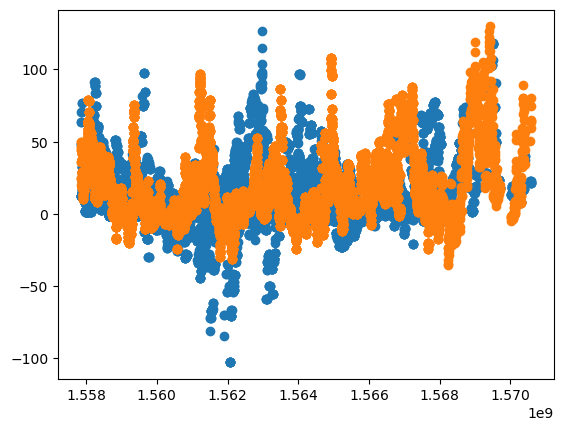

In [5]:
plt.scatter(tm,QL2019)
plt.scatter(tm,QLs2019)

In [4]:
#rQ values?

forQL = 1.29*1.2e-3*2.257e6
forQS = 1.29*1.2e-3*1005.7

delq = np.mean(qss-qas)/1000
delV = np.mean(Vs)
delT = np.mean(SSTs-Ts)

print(delq)
print(delV)
print(delT)

print(rV)
print(rq)
print(rT)

print(forQL*delq*rV)
print(forQL*delV*rq)

print(forQS*delT*rV)
print(forQS*delV*rT)

print(forQL*delV*rq/rQL)
print(forQL*delq*rV/rQL)

print(forQS*delV*rT/rQS)
print(forQS*delT*rV/rQS)

print(rQL)
print(rQS)



-0.00026326595439443603
5.895096773234468
0.6735866072138447
2.628770734725685
0.0006563980869179689
1.719798694236416
-2.417964533450687
13.519504070090962
2.7566749595404287
15.783668834105358
0.6117738705580994
-0.10941581243160077
0.8673222990863818
0.15148098258220866
22.098858288533314
18.19815868994897


In [3]:
# Create DataFrames for each saildrone subset
def create_saildrone_df(time, QL, QS, start, end):
    subset_df = pd.DataFrame({
        'datetime': time[start:end].squeeze(),
        'QL': QL[start:end].squeeze(),
        'QS': QS[start:end].squeeze(),
    })
    return subset_df

# load and match data
s0_m = pd.read_csv('data/m2/sd-for-m2-2019.csv')
m = pd.read_csv('data/m2/m2-2019.csv')

t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2019 = m['QL']
QS2019 = m['QS']
qs2019 = m['qs']
qa2019 = m['qa']
SST2019 = m['SST']
T2019 = m['T']
V2019 = m['V']

QLs2019 = []
QSs2019 = []
qss2019 = []
qas2019 = []
SSTs2019 = []
Ts2019 = []
Vs2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])
    qss2019.append(qs0[k])
    qas2019.append(qa0[k])
    SSTs2019.append(SST0[k])
    Ts2019.append(T0[k])
    Vs2019.append(V0[k])

# Identify local minima to separate saildrones
localmin = np.array(argrelextrema(np.array(tm), np.less))

# Create DataFrames for each saildrone subset
sd = create_saildrone_df(tm, np.array(QLs2019), np.array(QSs2019),0, localmin[0][0])
m2 = create_saildrone_df(tm, np.array(QL2019), np.array(QS2019),0, localmin[0][0])

# load and match data
s0_m = pd.read_csv('data/e5/sd-for-e5-2019.csv')
m = pd.read_csv('data/e5/e5-2019.csv')
t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2019 = m['QL']
QS2019 = m['QS']
qs2019 = m['qs']
qa2019 = m['qa']
SST2019 = m['SST']
T2019 = m['T']
V2019 = m['V']

QLs2019 = []
QSs2019 = []
qss2019 = []
qas2019 = []
SSTs2019 = []
Ts2019 = []
Vs2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])
    qss2019.append(qs0[k])
    qas2019.append(qa0[k])
    SSTs2019.append(SST0[k])
    Ts2019.append(T0[k])
    Vs2019.append(V0[k])

localmin = np.array(argrelextrema(np.array(tm), np.less))
e5 = create_saildrone_df(tm, np.array(QL2019), np.array(QS2019),0, localmin[0][0])

# load and match data
s0_m = pd.read_csv('data/c2/sd-for-c2-2019.csv')
m = pd.read_csv('data/c2/c2-2019.csv')


t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2019 = m['QL']
QS2019 = m['QS']
qs2019 = m['qs']
qa2019 = m['qa']
SST2019 = m['SST']
T2019 = m['T']
V2019 = m['V']

QLs2019 = []
QSs2019 = []
qss2019 = []
qas2019 = []
SSTs2019 = []
Ts2019 = []
Vs2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])
    qss2019.append(qs0[k])
    qas2019.append(qa0[k])
    SSTs2019.append(SST0[k])
    Ts2019.append(T0[k])
    Vs2019.append(V0[k])

localmin = np.array(argrelextrema(np.array(tm), np.less)) 
c2 = create_saildrone_df(tm, np.array(QL2019), np.array(QS2019),0,localmin[0][0])

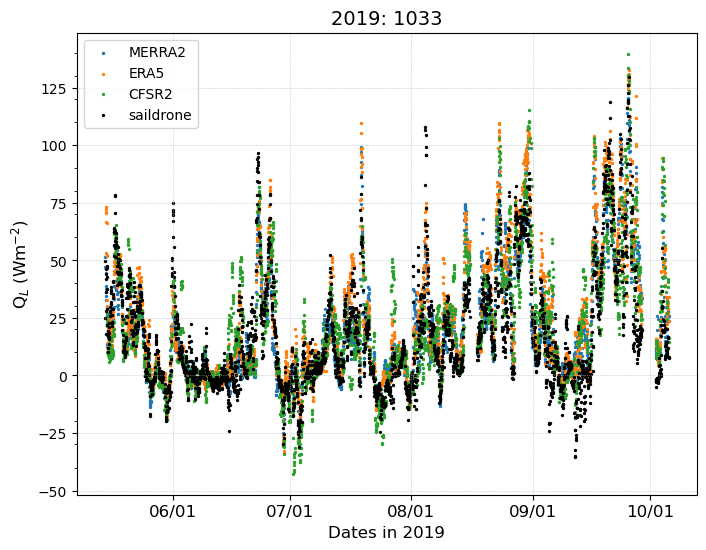

In [4]:
plt.figure(figsize=(8,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

sd.sort_values(by=['datetime'])
m2.sort_values(by=['datetime'])
e5.sort_values(by=['datetime'])
c2.sort_values(by=['datetime'])

t = pd.to_datetime(m2['datetime'],unit='s')
plt.scatter(t,m2['QL'], s=2,label='MERRA2')

t = pd.to_datetime(e5['datetime'],unit='s')
plt.scatter(t,e5['QL'], s=2,label='ERA5')

t = pd.to_datetime(c2['datetime'],unit='s')
plt.scatter(t,c2['QL'], s=2,label='CFSR2')

t = pd.to_datetime(sd['datetime'],unit='s')
plt.scatter(t,sd['QL'], s=2,c='k',label='saildrone')

plt.title('2019: 1033',fontsize=14)
plt.xlabel('Dates in 2019',fontsize=12)
plt.ylabel('Q$_L$ (Wm$^{-2}$)',fontsize=12)



plt.legend()

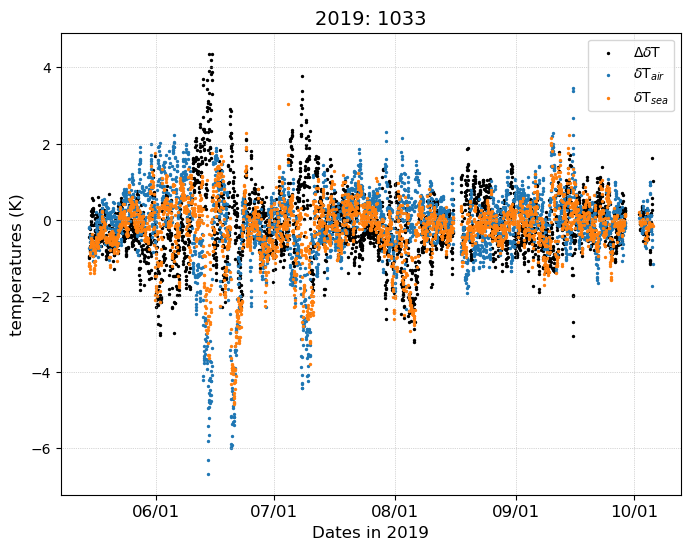

In [9]:
# Create DataFrames for each saildrone subset

def create_saildrone_df(time, delT, SST, T, start, end):
    subset_df = pd.DataFrame({
        'datetime': time[start:end].squeeze(),
        'delT': delT[start:end].squeeze(),
        'SST': SST[start:end].squeeze(),
        'T': T[start:end].squeeze(),
    })
    return subset_df

# load and match data
s0_m = pd.read_csv('data/e5/sd-for-e5-2019.csv')
m = pd.read_csv('data/e5/e5-2019.csv')
t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2019 = m['QL']
QS2019 = m['QS']
qs2019 = m['qs']
qa2019 = m['qa']
SST2019 = m['SST']
T2019 = m['T']
V2019 = m['V']

QLs2019 = []
QSs2019 = []
qss2019 = []
qas2019 = []
SSTs2019 = []
Ts2019 = []
Vs2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])
    qss2019.append(qs0[k])
    qas2019.append(qa0[k])
    SSTs2019.append(SST0[k])
    Ts2019.append(T0[k])
    Vs2019.append(V0[k])

Tsdiff = np.array(SSTs2019) - np.array(Ts2019)
Tdiff = np.array(SST2019)- np.array(T2019)

localmin = np.array(argrelextrema(np.array(tm), np.less))
sd = create_saildrone_df(tm, np.array(Tsdiff), np.array(SSTs2019),np.array(Ts2019),0, localmin[0][0])
e5 = create_saildrone_df(tm, np.array(Tdiff), np.array(SST2019),np.array(T2019),0, localmin[0][0])

plt.figure(figsize=(8,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

sd.sort_values(by=['datetime'])
e5.sort_values(by=['datetime'])

totaldiff = e5['delT'] - sd['delT']
Tdiff = e5['T'] - sd['T']
SSTdiff = e5['SST'] - sd['SST']

t = pd.to_datetime(e5['datetime'],unit='s')
plt.scatter(t,totaldiff,c='k', s=2,label='$\Delta\delta$T')

t = pd.to_datetime(e5['datetime'],unit='s')
plt.scatter(t,Tdiff, s=2,label='$\delta$T$_{air}$')

t = pd.to_datetime(e5['datetime'],unit='s')
plt.scatter(t,SSTdiff, s=2,label='$\delta$T$_{sea}$')

plt.title('2019: 1033',fontsize=14)
plt.xlabel('Dates in 2019',fontsize=12)
plt.ylabel('temperatures (K)',fontsize=12)

plt.legend()

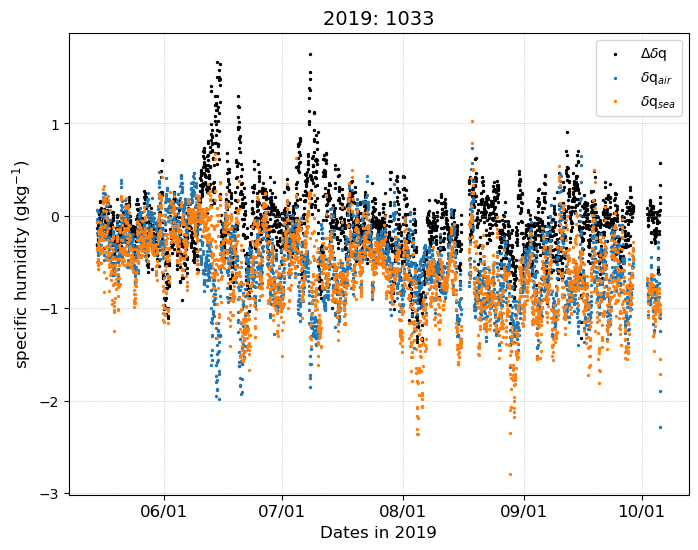

In [8]:
# Create DataFrames for each saildrone subset

def create_saildrone_df(time, delT, SST, T, start, end):
    subset_df = pd.DataFrame({
        'datetime': time[start:end].squeeze(),
        'delT': delT[start:end].squeeze(),
        'SST': SST[start:end].squeeze(),
        'T': T[start:end].squeeze(),
    })
    return subset_df

# load and match data
s0_m = pd.read_csv('data/e5/sd-for-e5-2019.csv')
m = pd.read_csv('data/e5/e5-2019.csv')
t0 = s0_m['datetime']
QL0 = s0_m['QL']
QS0 = s0_m['QS']
qs0 = s0_m['qs']
qa0 = s0_m['qa']
SST0 = s0_m['SST']
T0 = s0_m['T']
V0 = s0_m['V']

tm = m['datetime']
QL2019 = m['QL']
QS2019 = m['QS']
qs2019 = m['qs']
qa2019 = m['qa']
SST2019 = m['SST']
T2019 = m['T']
V2019 = m['V']

QLs2019 = []
QSs2019 = []
qss2019 = []
qas2019 = []
SSTs2019 = []
Ts2019 = []
Vs2019 = []
for t in tm:
    k = find_nearest(t0,t)
    QLs2019.append(QL0[k])
    QSs2019.append(QS0[k])
    qss2019.append(qs0[k])
    qas2019.append(qa0[k])
    SSTs2019.append(SST0[k])
    Ts2019.append(T0[k])
    Vs2019.append(V0[k])

Tsdiff = np.array(qss2019) - np.array(qas2019)
Tdiff = np.array(qs2019)- np.array(qa2019)

localmin = np.array(argrelextrema(np.array(tm), np.less))
sd = create_saildrone_df(tm, np.array(Tsdiff), np.array(qss2019),np.array(qas2019),0, localmin[0][0])
e5 = create_saildrone_df(tm, np.array(Tdiff), np.array(qs2019),np.array(qa2019),0, localmin[0][0])

plt.figure(figsize=(8,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=12)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(which='major', linestyle=':', linewidth=0.5)  # Show both major and minor gridlines

sd.sort_values(by=['datetime'])
e5.sort_values(by=['datetime'])

totaldiff = e5['delT'] - sd['delT']
Tdiff = e5['T'] - sd['T']
SSTdiff = e5['SST'] - sd['SST']

t = pd.to_datetime(e5['datetime'],unit='s')
plt.scatter(t,totaldiff,c='k',s=2,label='$\Delta\delta$q')

t = pd.to_datetime(e5['datetime'],unit='s')
plt.scatter(t,Tdiff, s=2,label='$\delta$q$_{air}$')

t = pd.to_datetime(e5['datetime'],unit='s')
plt.scatter(t,SSTdiff, s=2,label='$\delta$q$_{sea}$')

plt.title('2019: 1033',fontsize=14)
plt.xlabel('Dates in 2019',fontsize=12)
plt.ylabel('specific humidity (gkg$^{-1}$)',fontsize=12)

plt.legend()